In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Clean Data_2.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
y = df['Biopsy']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Feature Selection

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [9]:
X.shape

(856, 21)

In [10]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.20673316, 0.11808906, 0.15327493, 0.1000751 , 0.01203462,
       0.03645825, 0.03298424, 0.02666502, 0.15333423, 0.01561817,
       0.03390465, 0.01054187, 0.01229594, 0.00676831, 0.00404044,
       0.01262283, 0.009746  , 0.01421806, 0.01027068, 0.01629825,
       0.01402618])

In [11]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

In [12]:
feat_importances

Age                                0.206733
Number of sexual partners          0.118089
First sexual intercourse           0.153275
Num of pregnancies                 0.100075
Smokes                             0.012035
Smokes (years)                     0.036458
Smokes (packs/year)                0.032984
Hormonal Contraceptives            0.026665
Hormonal Contraceptives (years)    0.153334
IUD                                0.015618
IUD (years)                        0.033905
STDs                               0.010542
STDs (number)                      0.012296
STDs:condylomatosis                0.006768
STDs:syphilis                      0.004040
STDs:HIV                           0.012623
STDs: Number of diagnosis          0.009746
Dx:Cancer                          0.014218
Dx:CIN                             0.010271
Dx:HPV                             0.016298
Dx                                 0.014026
dtype: float64

In [13]:
df['First sexual intercourse']

0      15.0
1      14.0
2      17.0
3      16.0
4      21.0
       ... 
851    18.0
852    19.0
853    17.0
854    24.0
855    20.0
Name: First sexual intercourse, Length: 856, dtype: float64

<AxesSubplot:>

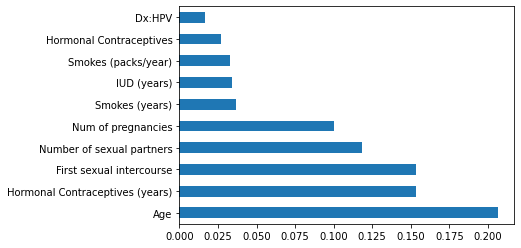

In [14]:
feat_importances.nlargest(10).plot(kind='barh')

In [15]:
model = SelectFromModel(clf, prefit=True)

In [16]:
X_new = model.transform(X)

In [17]:
X_new.shape

(856, 5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

# Building Decision Tree model before implementing Feature Selection

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8798586572438163


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       263
           1       0.18      0.20      0.19        20

    accuracy                           0.88       283
   macro avg       0.56      0.57      0.56       283
weighted avg       0.89      0.88      0.88       283



[[245  18]
 [ 16   4]]


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

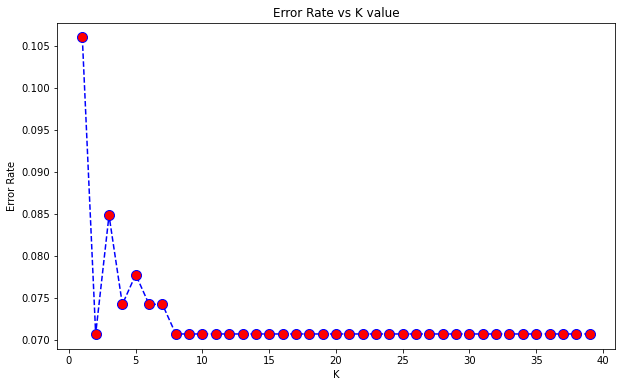

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [28]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9293286219081273


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       263
           1       0.00      0.00      0.00        20

    accuracy                           0.93       283
   macro avg       0.46      0.50      0.48       283
weighted avg       0.86      0.93      0.90       283



[[263   0]
 [ 20   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Univariate

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [31]:
fit = bestfeatures.fit(X,y)

In [32]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [33]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [34]:
featureScores.columns = ['Specs','Score']

In [35]:
print(featureScores.sort_values(ascending=False,by='Score'))

                              Specs      Score
5                    Smokes (years)  44.465395
8   Hormonal Contraceptives (years)  26.425415
19                           Dx:HPV  21.676586
17                        Dx:Cancer  21.676586
20                               Dx  20.644255
12                    STDs (number)  17.034090
10                      IUD (years)  16.726887
15                         STDs:HIV  13.649731
18                           Dx:CIN  10.838293
11                             STDs  10.413651
16        STDs: Number of diagnosis   8.766596
0                               Age   7.105021
13              STDs:condylomatosis   6.944348
6               Smokes (packs/year)   5.956898
9                               IUD   4.515031
14                    STDs:syphilis   1.235955
3                Num of pregnancies   1.184499
4                            Smokes   0.636779
1         Number of sexual partners   0.041626
2          First sexual intercourse   0.016008
7           H

Text(0, 0.5, 'Accuracy Score')

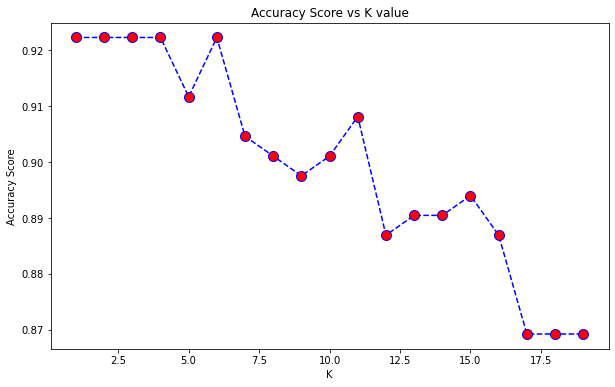

In [36]:
accuracy = []
for i in range(1,20):
    X_new = SelectKBest(chi2, k=i).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
    new_model = DecisionTreeClassifier()
    new_model.fit(X_train,y_train)
    predictions = new_model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Score vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [37]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, y)

In [38]:
X_new.shape

(856, 6)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
new_model = DecisionTreeClassifier()
new_model.fit(X_train,y_train)
predictions = new_model.predict(X_test)

In [40]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9257950530035336


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       263
           1       0.40      0.10      0.16        20

    accuracy                           0.93       283
   macro avg       0.67      0.54      0.56       283
weighted avg       0.90      0.93      0.90       283



[[260   3]
 [ 18   2]]


In [41]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

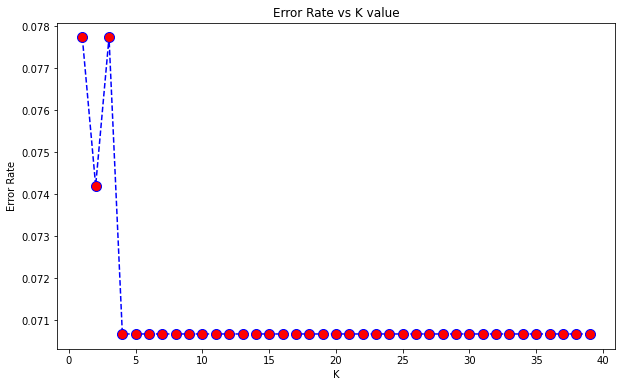

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [44]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9293286219081273


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       263
           1       0.00      0.00      0.00        20

    accuracy                           0.93       283
   macro avg       0.46      0.50      0.48       283
weighted avg       0.86      0.93      0.90       283



[[263   0]
 [ 20   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
new_model = RandomForestClassifier()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
new_model.fit(X_train,y_train)
predictions = new_model.predict(X_test)

In [48]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9187279151943463


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       263
           1       0.20      0.05      0.08        20

    accuracy                           0.92       283
   macro avg       0.57      0.52      0.52       283
weighted avg       0.88      0.92      0.90       283



[[259   4]
 [ 19   1]]


In [49]:
X_new.shape

(856, 6)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [51]:
model = Sequential()

# input layer
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(units=3,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# compiler
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])


Epoch 1/600
18/18 [==============================] - 1s 13ms/step - loss: 0.7508 - val_loss: 0.6256
Epoch 2/600
18/18 [==============================] - 0s 3ms/step - loss: 0.7088 - val_loss: 0.5958
Epoch 3/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6501 - val_loss: 0.5727
Epoch 4/600
18/18 [==============================] - 0s 3ms/step - loss: 0.7123 - val_loss: 0.5532
Epoch 5/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6011 - val_loss: 0.5340
Epoch 6/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6314 - val_loss: 0.5169
Epoch 7/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6335 - val_loss: 0.5023
Epoch 8/600
18/18 [==============================] - 0s 3ms/step - loss: 0.5410 - val_loss: 0.4874
Epoch 9/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6225 - val_loss: 0.4723
Epoch 10/600
18/18 [==============================] - 0s 4ms/step - loss: 0.5172 - val_loss: 0.4573
Epoch 11

18/18 [==============================] - 0s 4ms/step - loss: 0.2650 - val_loss: 0.2602
Epoch 84/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2818 - val_loss: 0.2599
Epoch 85/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2693 - val_loss: 0.2592
Epoch 86/600
18/18 [==============================] - 0s 2ms/step - loss: 0.2787 - val_loss: 0.2588
Epoch 87/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2907 - val_loss: 0.2584
Epoch 88/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2710 - val_loss: 0.2579
Epoch 89/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2711 - val_loss: 0.2575
Epoch 90/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2641 - val_loss: 0.2569
Epoch 91/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2781 - val_loss: 0.2566
Epoch 92/600
18/18 [==============================] - 0s 2ms/step - loss: 0.2650 - val_loss: 0.2560
Epoch 93/600


18/18 [==============================] - 0s 3ms/step - loss: 0.2341 - val_loss: 0.2457
Epoch 245: early stopping


In [52]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9187279151943463


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       263
           1       0.20      0.05      0.08        20

    accuracy                           0.92       283
   macro avg       0.57      0.52      0.52       283
weighted avg       0.88      0.92      0.90       283



[[259   4]
 [ 19   1]]


## Naive Bayes before Feature Selection

In [60]:
X = df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
y = df['Biopsy']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(X_train,y_train)

GaussianNB()

In [71]:
predictions = gnb.predict(X_test)

In [72]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.872791519434629


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       263
           1       0.21      0.30      0.25        20

    accuracy                           0.87       283
   macro avg       0.58      0.61      0.59       283
weighted avg       0.89      0.87      0.88       283



[[241  22]
 [ 14   6]]


### XGBoost

In [73]:
import xgboost as xgb

In [74]:
xgb_cl = xgb.XGBClassifier()

In [75]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
predictions = xgb_cl.predict(X_test)

In [77]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9187279151943463


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       263
           1       0.20      0.05      0.08        20

    accuracy                           0.92       283
   macro avg       0.57      0.52      0.52       283
weighted avg       0.88      0.92      0.90       283



[[259   4]
 [ 19   1]]


# Using K-folds

### Decision Tree

In [88]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [103]:
accuracy = []
for i in range(2,20):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=i, scoring='accuracy')
    predictions = model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))

In [104]:
len(accuracy)

18

Text(0.5, 0, 'cv')

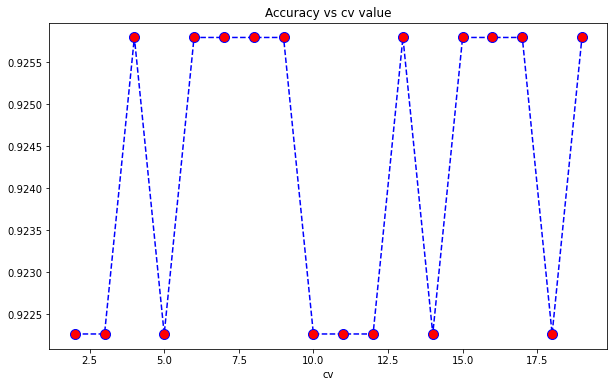

In [105]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy vs cv value')
plt.xlabel('cv')

In [106]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
predictions = model.predict(X_test)

In [107]:
predictions = model.predict(X_test)

In [108]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9257950530035336


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       263
           1       0.43      0.15      0.22        20

    accuracy                           0.93       283
   macro avg       0.68      0.57      0.59       283
weighted avg       0.90      0.93      0.91       283



[[259   4]
 [ 17   3]]


In [110]:
accuracy = []
for i in range(2,20):
    model = KNeighborsClassifier(n_neighbors=6)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    predictions = model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))

Text(0.5, 0, 'cv')

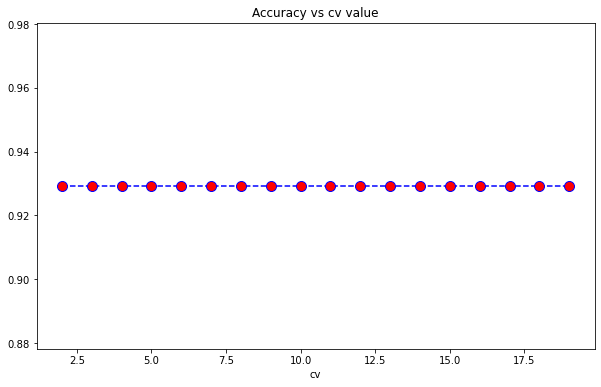

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy vs cv value')
plt.xlabel('cv')

In [112]:
accuracy = []
for i in range(2,20):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=i, scoring='accuracy')
    predictions = model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))

Text(0.5, 0, 'cv')

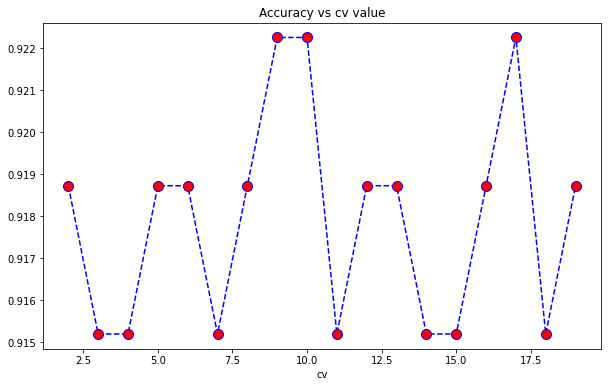

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy vs cv value')
plt.xlabel('cv')

In [117]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
predictions = model.predict(X_test)

In [118]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9187279151943463


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       263
           1       0.00      0.00      0.00        20

    accuracy                           0.92       283
   macro avg       0.46      0.49      0.48       283
weighted avg       0.86      0.92      0.89       283



[[260   3]
 [ 20   0]]
